### This approach is used to identify, which routes are mostly used for wild animal trafficking in Bangladesh through an application which will be used to monitor the trafficking of wild animals in Bangladesh. Supervised machine learning algorithms are used to determine if a certain route would be taken for an occurrence reported by any user.   

In [59]:
import numpy as np # linear algebra
import pandas as pd # data processing 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [60]:
# Importing Dataset
wildlife_tracker = pd.read_csv('/content/wildlife_tracker.csv')

# Data Wrangling

In [61]:
# Visualizing top 5 rows from the Dataset
wildlife_tracker.head()

,animal_type,scientific_name,average_lifespan,request_time,request_udapte_time,location,route
0,Dog,Canis Lupus Familiaris,13,2010-10-09T03:59:12.000000Z,2010-10-09T04:13:59.000000Z,Dhaka,Bogra - Sariakandi Rd
1,Cat,Felis Catus,16,2010-10-09T04:06:22.000000Z,2010-10-09T04:06:22.000000Z,Chittagong,Uposhohor Rd
2,Hawk,Buteo,20,2010-11-04T22:40:13.000000Z,2010-06-21T12:09:28.000000Z,Khulna,Gohail Rd
3,White-tailed Eagle,Haliaeetus Albicilla,20,2010-06-21T12:09:50.000000Z,2010-06-21T12:09:50.000000Z,Bogura,Matidali - Dhorompur Rd
4,Fox,Vulpes Vulpes,4,2010-06-21T12:10:08.000000Z,2010-06-21T12:10:08.000000Z,Sylhet,Chondon - Baisha Rd


In [62]:
# Size of the dataset
print(f"The Dataset to be classified has {wildlife_tracker.shape[0]} rows and {wildlife_tracker.shape[1]} columns.")

The Dataset to be classified has 280 rows and 7 columns.


In [63]:
# Null Values
wildlife_tracker.isnull().sum()

animal_type            0
scientific_name        0
average_lifespan       0
request_time           0
request_udapte_time    0
location               0
route                  0
dtype: int64

The dataset has no null values. There are several approaches for handling null values. We will use the null value handling approaches later if the actual dataset contains any null values.

In [64]:
# Dataset Info
wildlife_tracker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   animal_type          280 non-null    object
 1   scientific_name      280 non-null    object
 2   average_lifespan     280 non-null    int64 
 3   request_time         280 non-null    object
 4   request_udapte_time  280 non-null    object
 5   location             280 non-null    object
 6   route                280 non-null    object
dtypes: int64(1), object(6)
memory usage: 15.4+ KB


In [65]:
# Type Casting

wildlife_tracker['animal_type']=wildlife_tracker['animal_type'].astype('category')
wildlife_tracker['scientific_name']=wildlife_tracker['scientific_name'].astype('category')
wildlife_tracker['location']=wildlife_tracker['location'].astype('category')
wildlife_tracker['route']=wildlife_tracker['route'].astype('category')

In [66]:
# Updated Dataset Info
wildlife_tracker.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   animal_type          280 non-null    category
 1   scientific_name      280 non-null    category
 2   average_lifespan     280 non-null    int64   
 3   request_time         280 non-null    object  
 4   request_udapte_time  280 non-null    object  
 5   location             280 non-null    category
 6   route                280 non-null    category
dtypes: category(4), int64(1), object(2)
memory usage: 8.9+ KB


In [67]:
# Identify duplication
print(f"Dataset Classify has {wildlife_tracker.duplicated().sum()} duplicate values.")

Dataset Classify has 78 duplicate values.


Since we utilized synthetic data for the classification, I won't deal with duplicate values here, but I have commented on how to deal with them. It will be required when we use an actual dataset.

In [68]:
# Clearing duplicate values
# wildlife_tracker.drop_duplicates(keep = 'first',inplace = True) # keeping the first row 

In [69]:
# Updated dataset size
# wildlife_tracker.shape

# Exploratory Data Analysis (EDA)

## Univariate Analysis
### Categorical

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


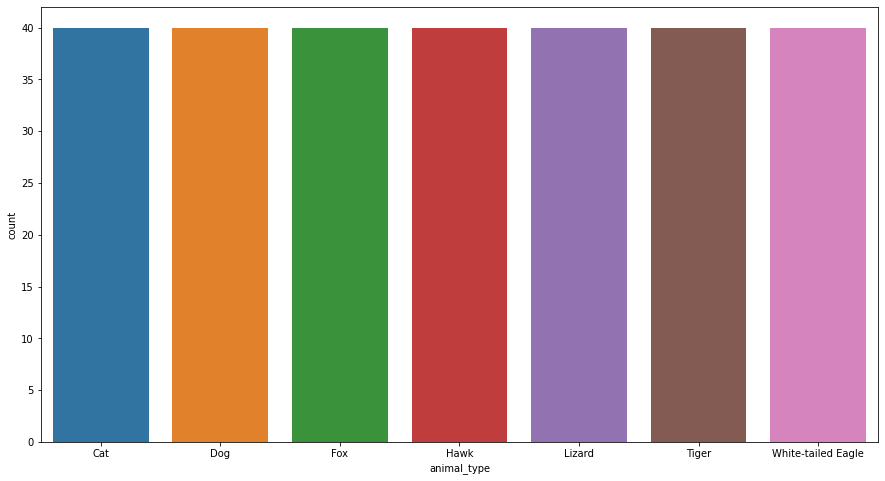

In [70]:
# Animal types

plt.figure(figsize=(15,8))
sns.countplot(wildlife_tracker['animal_type'])

Seven different species of animals that are victim of wild animal trafficking in Bangladesh are represented in this dataset. Nearly forty rows of data are present for each wild animal in the collection.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


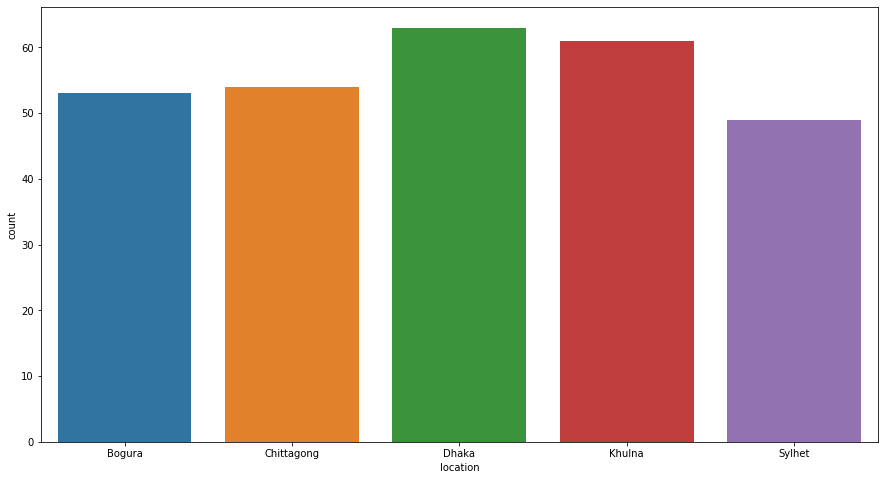

In [71]:
# Locations

plt.figure(figsize=(15,8))
sns.countplot(wildlife_tracker['location'])

This dataset includes five places where there have been reports of wild animal trafficking. We can observe that Dhaka and Khulna have the most reported instances. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


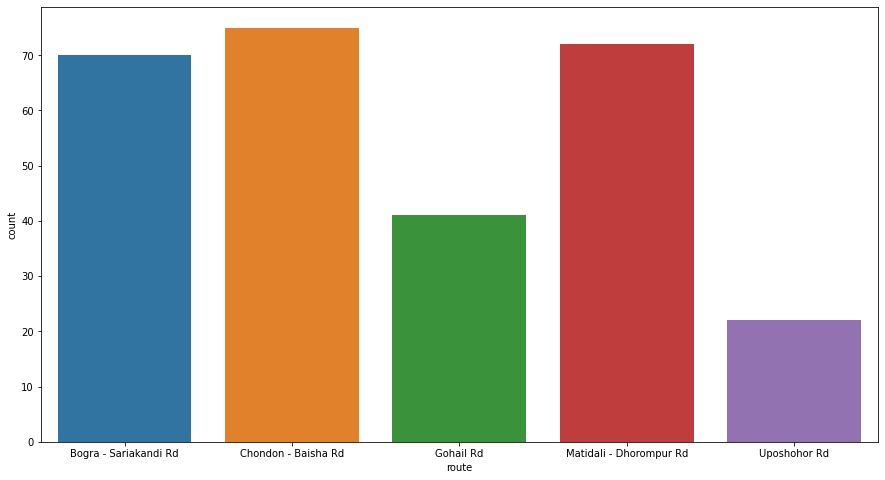

In [72]:
# Routes

plt.figure(figsize=(15,8))
sns.countplot(wildlife_tracker['route'])

This dataset includes five routes that are mostly utilized in Bangladesh for the trafficking of wild animals. We can observe that the three routes Bogra-Sariakandi Road, Matidali-Dhorompur Road and Condon-Baisha Road are most frequently used for trafficking wild animals in Bangladesh.

## Multivariate Analysis
### Categorical

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


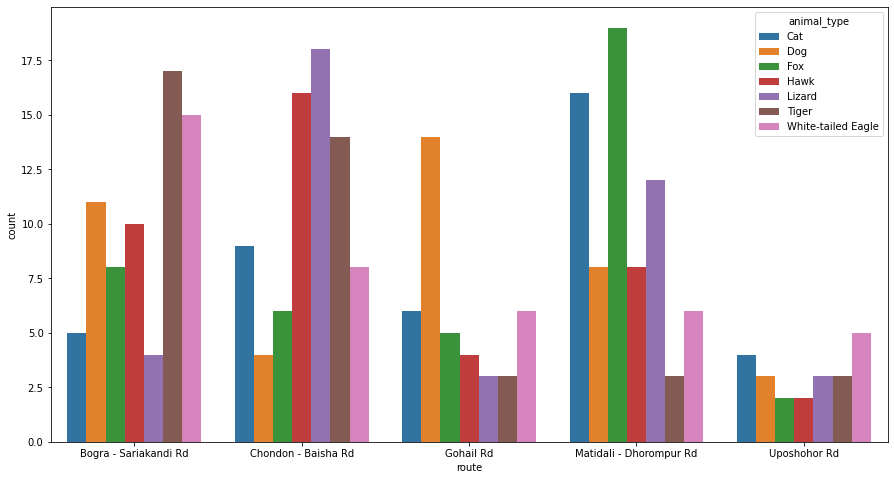

In [73]:
# Most used routes hue on each animal type
 
plt.figure(figsize=(15,8))
sns.countplot(wildlife_tracker['route'],hue=wildlife_tracker['animal_type'])

Here, we may determine which routes in Bangladesh are most commonly utilized for a specific wild species trafficking. 

Below, I've provided a list of a few routes utilized regularly for the trafficking of a certain wild species.

Dog -> Gohail Road

Cat -> Matidali - Dhorompur Road

Hawk -> Chondon - Baisha Rd

White-tailed Eagle -> Bogra - Sariakandi Rd

Fox -> Matidali - Dhorompur Road

Lizard -> Chondon - Baisha Rd

Tiger -> Bogra - Sariakandi Rd

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


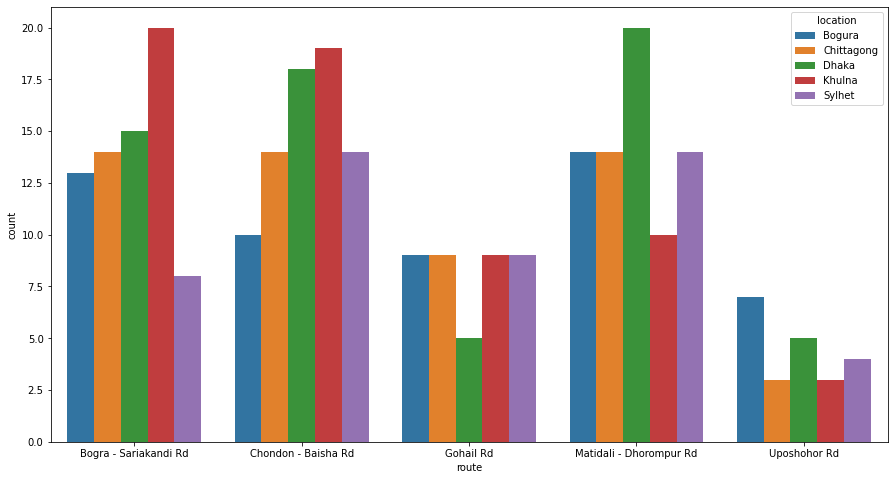

In [74]:
# Most used routes hue on the locations from where a specific incident is reported

plt.figure(figsize=(15,8))
sns.countplot(wildlife_tracker['route'],hue=wildlife_tracker['location'])

Based on the reporting locations, we may determine which routes in Bangladesh are most frequently used for trafficking wild animals.

Here, the two routes Matidali-Dhorompur & Chondon-Baisha seem to be used most frequently in the reports of trafficking incidents from Dhaka. Similar to this, the three routes seem to be recorded frequently for trafficking incidents in Chittagong are Bogra-Sariakandi, Matidali-Dhorompur, and Chondon-Baisha. Comparably, the two routes Bogra-Sariakandi and Chondon-Baisha are most likely used in the trafficking incidents reported from Khulna. Similarly, the two routes Bogra-Sariakandi & Matidali-Dhorompur are most likely used in the trafficking incidents recorded from Bogura. Likewise, the two routes Matidali-Dhorompur & Chondon-Baisha that are most likely being used in the trafficking incidents reported from Sylhet.








## Converting Categorical Features 

In [75]:
# Converting the the categorical columns into numeric 

Numeric_Data = pd.get_dummies(data = wildlife_tracker, columns = ['animal_type', 'scientific_name', 'location', 'route'],drop_first=True)

In [76]:
# Dataset that contains only numeric columns

Numeric_Data.head()

,average_lifespan,request_time,request_udapte_time,animal_type_Dog,animal_type_Fox,animal_type_Hawk,animal_type_Lizard,animal_type_Tiger,animal_type_White-tailed Eagle,scientific_name_Canis Lupus Familiaris,...,scientific_name_Panthera Tigris,scientific_name_Vulpes Vulpes,location_Chittagong,location_Dhaka,location_Khulna,location_Sylhet,route_Chondon - Baisha Rd,route_Gohail Rd,route_Matidali - Dhorompur Rd,route_Uposhohor Rd
0,13,2010-10-09T03:59:12.000000Z,2010-10-09T04:13:59.000000Z,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,16,2010-10-09T04:06:22.000000Z,2010-10-09T04:06:22.000000Z,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,20,2010-11-04T22:40:13.000000Z,2010-06-21T12:09:28.000000Z,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,20,2010-06-21T12:09:50.000000Z,2010-06-21T12:09:50.000000Z,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,4,2010-06-21T12:10:08.000000Z,2010-06-21T12:10:08.000000Z,0,1,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0


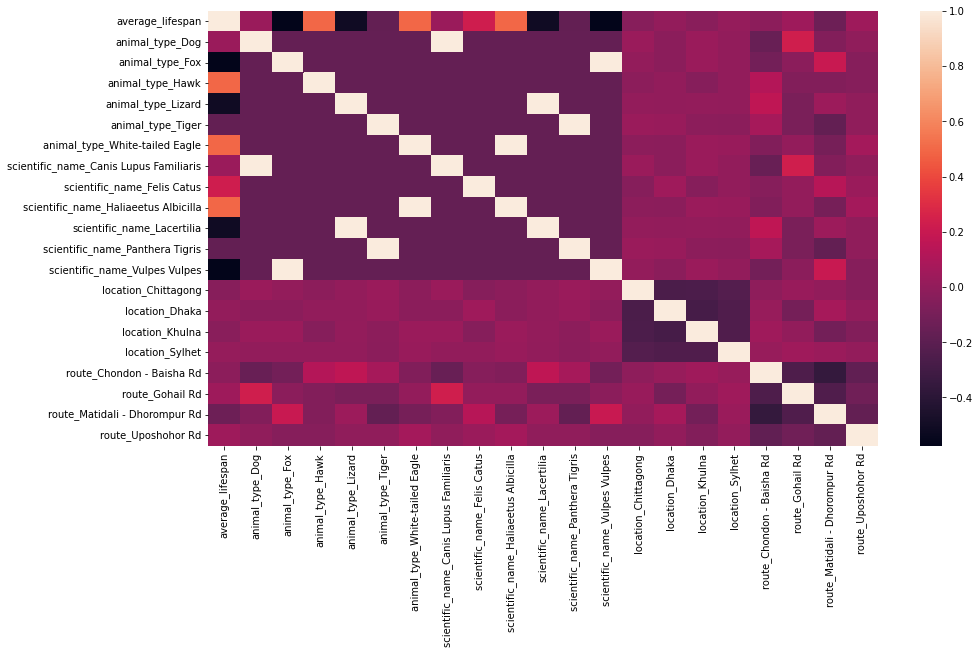

In [77]:
# Correlation Matrix

plt.figure(figsize=(15,8))
sns.heatmap(Numeric_Data.corr())

Here, we may assume that the only columns that have a significant impact on the target column "route" are "animal_type" and "location". Since "scientific name" and "animal type" are highly similar columns, we must choose one of them. The target column is unrelated to time stamps or average lifetime. Therefore, we must discard them.

# Classification
To categorize the routes used in Bangladesh for the trafficking of wild animals, multi-class classification approach has been used.


In [78]:
# input features

f = pd.get_dummies(data = wildlife_tracker, columns = ['animal_type', 'location'],drop_first=True) # applying categorical encoding
features = f.drop(['scientific_name', 'average_lifespan' , 'request_time', 'request_udapte_time', 'route'], axis=1)
features.head()

,animal_type_Dog,animal_type_Fox,animal_type_Hawk,animal_type_Lizard,animal_type_Tiger,animal_type_White-tailed Eagle,location_Chittagong,location_Dhaka,location_Khulna,location_Sylhet
0,1,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1


In [79]:
x = features # Collection of features
y = wildlife_tracker['route'] # Target or the labels to predict

In [80]:
# Generating numerical target columns

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
y = le.fit_transform(y)

In [81]:
# Train & Test dataset split

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x,y,random_state =7)

In [82]:
# Principal Component Analysis

from sklearn.decomposition import PCA

pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

## Pipeline

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


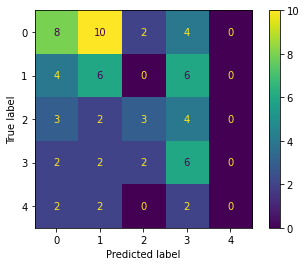

              precision    recall  f1-score   support

           0       0.42      0.33      0.37        24
           1       0.27      0.38      0.32        16
           2       0.43      0.25      0.32        12
           3       0.27      0.50      0.35        12
           4       0.00      0.00      0.00         6

    accuracy                           0.33        70
   macro avg       0.28      0.29      0.27        70
weighted avg       0.33      0.33      0.31        70



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
# KNeighbors Classifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knnclassifier = KNeighborsClassifier(n_neighbors=5)
knnclassifier.fit(x_train,y_train)
y_pred = knnclassifier.predict(x_test)
metrics.plot_confusion_matrix(knnclassifier,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


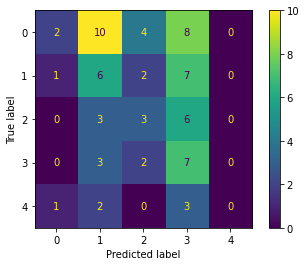

              precision    recall  f1-score   support

           0       0.50      0.08      0.14        24
           1       0.25      0.38      0.30        16
           2       0.27      0.25      0.26        12
           3       0.23      0.58      0.33        12
           4       0.00      0.00      0.00         6

    accuracy                           0.26        70
   macro avg       0.25      0.26      0.21        70
weighted avg       0.31      0.26      0.22        70



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
# Support Vector OneVsRest Classifier

from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
SVC = SVC()
SVC_O_VS_R = OneVsRestClassifier(SVC)
SVC_O_VS_R.fit(x_train,y_train)
y_pred = SVC_O_VS_R.predict(x_test)
metrics.plot_confusion_matrix(SVC_O_VS_R,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


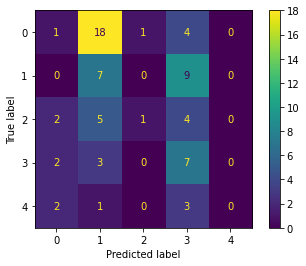

              precision    recall  f1-score   support

           0       0.14      0.04      0.06        24
           1       0.21      0.44      0.28        16
           2       0.50      0.08      0.14        12
           3       0.26      0.58      0.36        12
           4       0.00      0.00      0.00         6

    accuracy                           0.23        70
   macro avg       0.22      0.23      0.17        70
weighted avg       0.23      0.23      0.17        70



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
# Support Vector OneVsOne Classifier

from sklearn.multiclass import OneVsOneClassifier
SVC_O_VS_O = OneVsOneClassifier(SVC)
SVC_O_VS_O.fit(x_train,y_train)
y_pred = SVC_O_VS_O.predict(x_test)
metrics.plot_confusion_matrix(SVC_O_VS_O,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


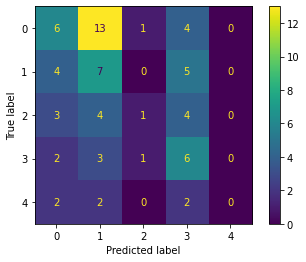

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.35      0.25      0.29        24
           1       0.24      0.44      0.31        16
           2       0.33      0.08      0.13        12
           3       0.29      0.50      0.36        12
           4       0.00      0.00      0.00         6

    accuracy                           0.29        70
   macro avg       0.24      0.25      0.22        70
weighted avg       0.28      0.29      0.26        70



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
metrics.plot_confusion_matrix(DT,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


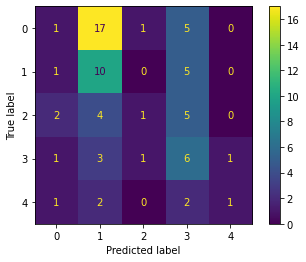

              precision    recall  f1-score   support

           0       0.17      0.04      0.07        24
           1       0.28      0.62      0.38        16
           2       0.33      0.08      0.13        12
           3       0.26      0.50      0.34        12
           4       0.50      0.17      0.25         6

    accuracy                           0.27        70
   macro avg       0.31      0.28      0.24        70
weighted avg       0.27      0.27      0.21        70



In [87]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
metrics.plot_confusion_matrix(RF,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


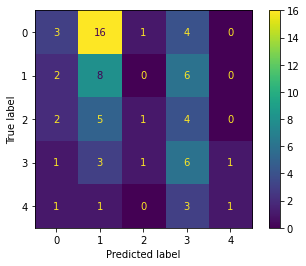

              precision    recall  f1-score   support

           0       0.33      0.12      0.18        24
           1       0.24      0.50      0.33        16
           2       0.33      0.08      0.13        12
           3       0.26      0.50      0.34        12
           4       0.50      0.17      0.25         6

    accuracy                           0.27        70
   macro avg       0.33      0.28      0.25        70
weighted avg       0.31      0.27      0.24        70



In [88]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)
y_pred = GB.predict(x_test)
metrics.plot_confusion_matrix(GB,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


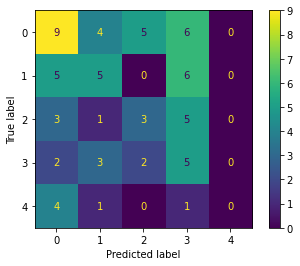

              precision    recall  f1-score   support

           0       0.39      0.38      0.38        24
           1       0.36      0.31      0.33        16
           2       0.30      0.25      0.27        12
           3       0.22      0.42      0.29        12
           4       0.00      0.00      0.00         6

    accuracy                           0.31        70
   macro avg       0.25      0.27      0.25        70
weighted avg       0.30      0.31      0.30        70



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [89]:
# Gaussian Naive Bayes Classifier

from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train,y_train)
y_pred = GNB.predict(x_test)
metrics.plot_confusion_matrix(GNB,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


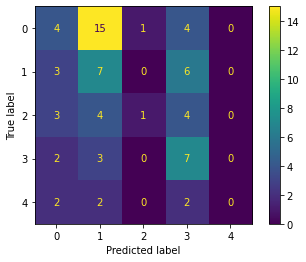

              precision    recall  f1-score   support

           0       0.29      0.17      0.21        24
           1       0.23      0.44      0.30        16
           2       0.50      0.08      0.14        12
           3       0.30      0.58      0.40        12
           4       0.00      0.00      0.00         6

    accuracy                           0.27        70
   macro avg       0.26      0.25      0.21        70
weighted avg       0.29      0.27      0.23        70



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
# Multi-layer Perceptron Classifier

from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(random_state=0, max_iter=300)
MLP.fit(x_train,y_train)
y_pred = MLP.predict(x_test)
metrics.plot_confusion_matrix(MLP,x_test, y_test)
plt.show()
print(classification_report(y_test, y_pred))

## Evaluating & Comparing Models

In [91]:
# Classifiers

names = ["knnclassifier", "SVC_O_VS_R", "SVC_O_VS_O", "DT", "RF", "GB", "GNB", "MLP"]

classifiers = [
    KNeighborsClassifier(n_neighbors=5),
    OneVsRestClassifier(SVC),
    OneVsOneClassifier(SVC),
    DecisionTreeClassifier(random_state=7),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    MLPClassifier(random_state=0, max_iter=300)]        

In [92]:
from sklearn.metrics import accuracy_score

scores = [] # Load accuracy score

for name, clf in zip(names, classifiers):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    validation_score = metrics.accuracy_score(y_test, y_pred)
    scores.append(validation_score)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [93]:
# Load data into data frame

df = pd.DataFrame()
df['name'] = names
df['validation_score'] = scores

In [94]:
# Visualizing accuracy score

cm = sns.light_palette("green", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,name,validation_score
0,knnclassifier,0.328571
1,SVC_O_VS_R,0.257143
2,SVC_O_VS_O,0.228571
3,DT,0.285714
4,RF,0.285714
5,GB,0.271429
6,GNB,0.314286
7,MLP,0.271429


Since we just utilized a short synthetic dataset, we should expect to have poor accuracy. The results of the classifiers will be impressive when we apply a real dataset to this problem. The hyperparameter of the classifier that performs the best can also be tuned at that time.